In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('data/bikes_rent.csv')

In [6]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [8]:
data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,5.705220,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,2.321125,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,0.670650,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,4.041864,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,5.420351,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872076,30.430100,73.020850,15.625371,6.984967,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,15.198937,8714.000000


In [9]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (12, 8)

<Axes: xlabel='season', ylabel='cnt'>

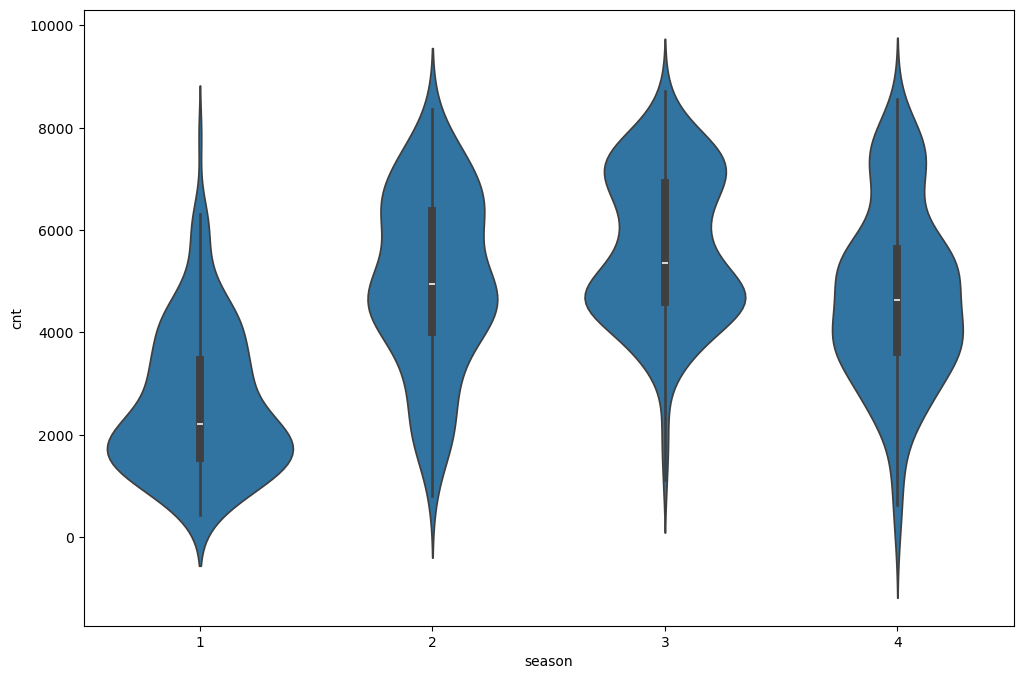

In [16]:
sns.violinplot(data=data, x="season", y="cnt")

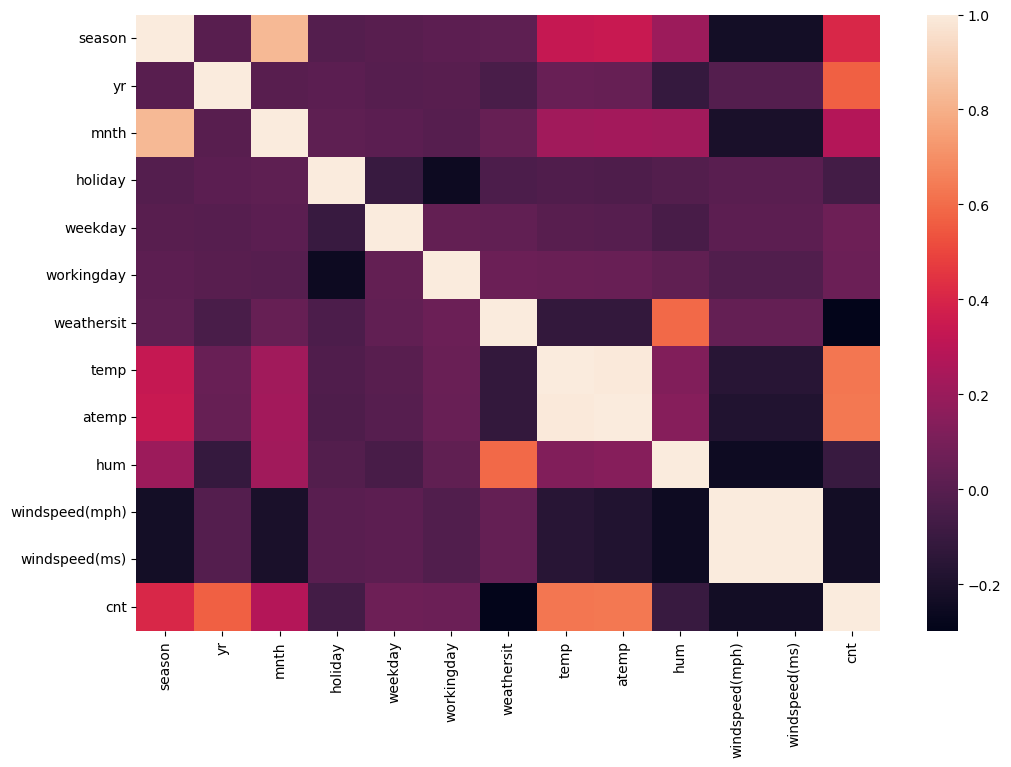

In [19]:
sns.heatmap(data.corr());

In [20]:
data.shape

(731, 13)

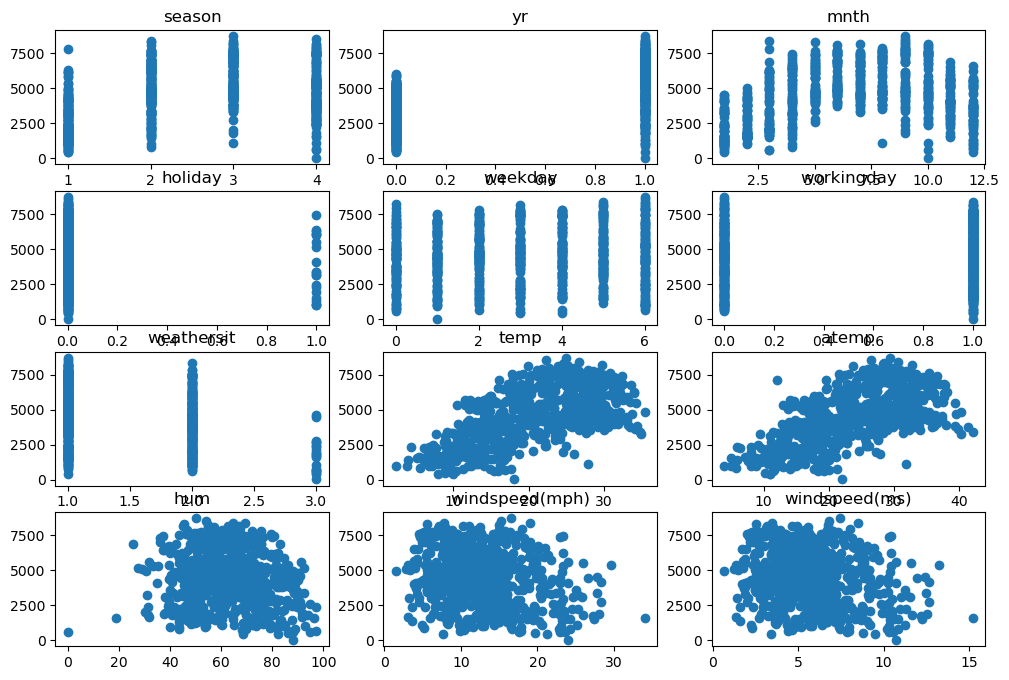

In [22]:
for i, col in enumerate(data.columns[:-1]):
    plt.subplot(4, 3, i + 1)
    plt.scatter(data[col], data['cnt'])
    plt.title(col)

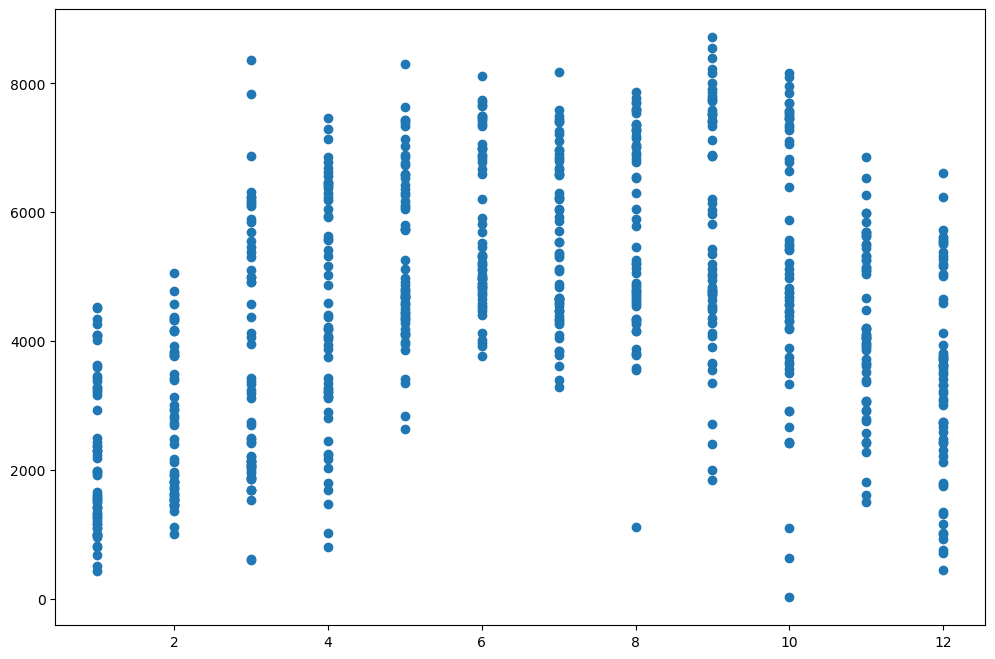

In [25]:
plt.scatter(data.mnth, data.cnt);

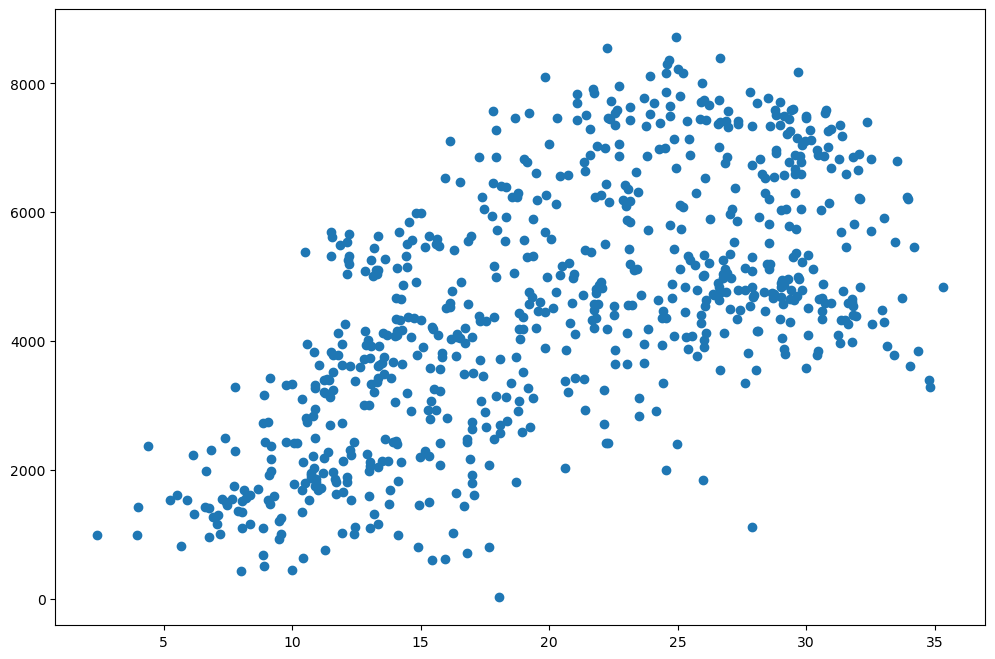

In [27]:
plt.scatter(data.temp, data.cnt);

In [34]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [35]:
linreg = LinearRegression()
lasso = Lasso(random_state=17)
ridge = Ridge(random_state=17)
lasso_cv = LassoCV(random_state=17)
ridge_cv = RidgeCV()


In [38]:
X, y = data.drop('cnt', axis=1).values, data.cnt.values

In [43]:
train_part_size = int(.7 * data.shape[0])

X_train, X_valid = X[:train_part_size, :], X[train_part_size:, :]
y_train, y_valid = y[:train_part_size], y[train_part_size:]


In [41]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)


In [45]:
linreg.fit(X_train_scaled, y_train)

LinearRegression()

In [48]:
np.sqrt(mean_squared_error(y_valid, linreg.predict(X_valid_scaled))) # на сколько ошибаемся

1121.7952135887326

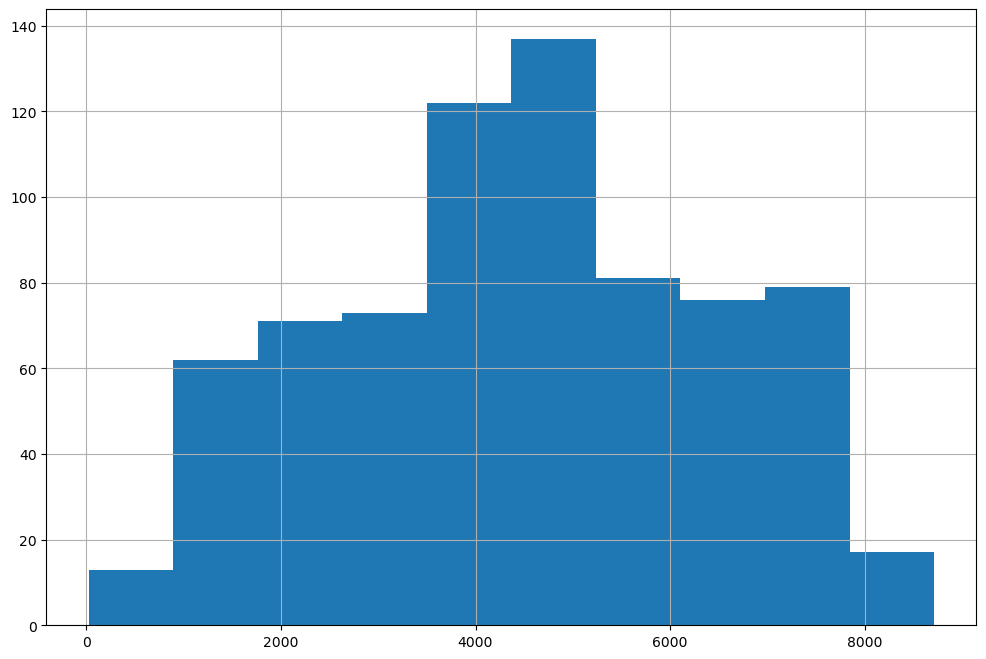

In [52]:
data['cnt'].hist();

In [55]:
pd.DataFrame(
    linreg.coef_, data.columns[:-1], columns=['coef']).sort_values(by='coef', ascending=False) # windspeed(ms) and windspeed(mph) 

,coef
windspeed(ms),3.049371e+12
yr,9.540709e+02
atemp,8.911712e+02
season,4.048580e+02
weekday,1.037115e+02
temp,6.248589e+01
mnth,3.081045e+01
workingday,1.470195e+01
holiday,-6.757563e+01
hum,-1.589771e+02


In [78]:
def train_validate_report(model, X_train_scaled, 
                          y_train, X_valid_scaled, 
                          y_valid, features_name,
                          forest=False):
    model.fit(X_train_scaled, y_train)
    print(f"MEAN = {np.sqrt(mean_squared_error(y_valid, model.predict(X_valid_scaled)))}")
    print("Model coefficients:")
    coef = model.feature_importances_ if forest else  model.coef_ # Это плохой код :)
    coef_name = 'Importance' if forest else 'Coef'
    print(pd.DataFrame(coef, features_name, columns=[coef_name]).sort_values(by=coef_name, ascending=False))
    
    

In [64]:
train_validate_report(lasso, X_train_scaled, y_train, X_valid_scaled, y_valid, data.columns[:-1])

MEAN = 1120.7214094932299
Model coefficients:
                      coef
yr              952.804560
atemp           877.159813
season          403.416439
weekday         102.643044
temp             75.953962
mnth             29.857599
workingday       14.173377
windspeed(ms)    -0.000000
holiday         -67.073435
hum            -157.547615
windspeed(mph) -187.341353
weathersit     -293.177257


In [65]:
train_validate_report(lasso_cv, X_train_scaled, y_train, X_valid_scaled, y_valid, data.columns[:-1])



MEAN = 1120.7436606195304
Model coefficients:
                      coef
yr              951.135002
atemp           883.344030
season          403.009581
weekday         101.892690
temp             69.238981
mnth             28.608639
workingday       13.478682
windspeed(ms)    -0.000000
holiday         -66.360460
hum            -156.248289
windspeed(mph) -186.267734
weathersit     -293.016582


In [67]:
train_validate_report(ridge_cv, X_train_scaled, y_train, X_valid_scaled, y_valid, data.columns[:-1])


MEAN = 1118.9035433219974
Model coefficients:
                      coef
yr              934.401985
atemp           534.482125
temp            410.485392
season          375.585733
weekday         100.838401
mnth             48.142392
workingday       16.165284
holiday         -70.019251
windspeed(ms)   -97.770430
windspeed(mph)  -97.770430
hum            -155.174377
weathersit     -291.035853


In [80]:
forest = RandomForestRegressor(random_state=17, n_estimators=500)

In [81]:
train_validate_report(forest, X_train_scaled, y_train, X_valid_scaled, y_valid, data.columns[:-1], True)


MEAN = 1047.1376755069205
Model coefficients:
                Importance
temp              0.298609
atemp             0.243309
yr                0.199314
hum               0.070565
season            0.062295
weathersit        0.030535
mnth              0.027786
windspeed(mph)    0.020349
weekday           0.019819
windspeed(ms)     0.019613
workingday        0.005191
holiday           0.002615
